# 1. Install and Import Dependencies

In [7]:
# !pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
# !pip3 install torch torchvision torchaudio


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu124
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 GB 2.8 MB/s eta 0:14:47
     ---------------------------------------- 0.0/2.5 GB 9.0 MB/s eta 0:04:38
     ---------------------------------------- 0.0/2.5 GB 13.6 MB/s eta 0:03:05
     ---------------------------------------- 0.0/2.5 GB 16.1 MB/s eta 0:02:36
     ---------------------------------------- 0.0/2.5 GB 17.9 MB/s eta 0:02:21
     ---------------------------------------- 0.0/2.5 GB 18.8 MB/s eta 0:02:13
     ---------------------------------------- 0.0/2.5 GB 19.6 MB/s eta 0:02:08
     ---------------------------------------- 0.0/2.5 GB 20.0 MB/s eta 0:02:05
     ---------------------------------------- 0.0/2.5 GB 20.4 MB/s eta 0:02:03
     ---------------------------------------- 0.0/2.5 GB 21.5 MB/s eta 0:01:57
    


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
from matplotlib import __version__ as mpl_version
import numpy as np

# Checking versions
print(f"PyTorch version: {torch.__version__}")
print(f"Matplotlib version: {mpl_version}")
print(f"NumPy version: {np.__version__}")


PyTorch version: 2.5.1+cu124
Matplotlib version: 3.10.0
NumPy version: 1.26.4


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [3]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.backends.cudnn.version())


True
12.4
90100


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np

# 2. Load Model

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-1-5 Python-3.11.1 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 10.7MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3. Make Detections with Images

In [ ]:
import torch
print(torch.cuda.is_available())

True


In [3]:
!nvidia-smi

Mon Jan  6 17:29:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   33C    P8              1W /   80W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
img_path = "input.jpg"
img = img_path

In [9]:
results = model(img)
results.print()

C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 360x550 21 cars, 1 bus, 1 truck
Speed: 32.0ms pre-process, 54.7ms inference, 130.9ms NMS per image at shape (1, 3, 448, 640)


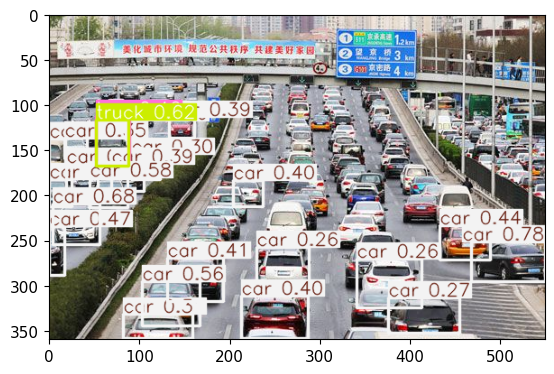

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[ 69,  80,  37],
         [ 90, 101,  58],
         [111, 122,  82],
         ...,
         [106,  80,  53],
         [105,  79,  52],
         [116,  90,  63]],
 
        [[ 72,  83,  40],
         [ 81,  92,  49],
         [ 79,  90,  50],
         ...,
         [114,  88,  61],
         [111,  85,  58],
         [116,  90,  63]],
 
        [[ 96, 107,  64],
         [ 97, 108,  65],
         [ 68,  79,  39],
         ...,
         [122,  96,  71],
         [116,  90,  65],
         [113,  87,  62]],
 
        ...,
 
        [[ 42,  45,  26],
         [ 46,  49,  28],
         [ 45,  48,  29],
         ...,
         [189, 182, 176],
         [187, 180, 174],
         [183, 176, 170]],
 
        [[ 47,  50,  33],
         [ 46,  49,  30],
         [ 40,  43,  26],
         ...,
         [124, 117, 111],
         [124, 117, 111],
         [119, 112, 106]],
 
        [[ 33,  36,  19],
         [ 34,  37,  20],
         [ 33,  36,  19],
         ...,
         [130, 123, 117],
  

# 4. Real Time Detections

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models

# 5. Train from scratch

In [7]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        # Webcam feed
        ret, frame = cap.read()

        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')

        # Writes out image to file
        cv2.imwrite(imgname, frame)

        # Render to the screen
        cv2.imshow('Image Collection', frame)

        # 2 second delay between captures
        time.sleep(2)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.301d1d5f-cb14-11ef-9322-f80dac146ecb.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

data\images\awake.3198c21e-cb14-11ef-9f42-f80dac146ecb.jpg
data\images\awake.3198c21f-cb14-11ef-a463-f80dac146ecb.jpg
data\images\awake.3198c220-cb14-11ef-ba93-f80dac146ecb.jpg
data\images\awake.3198c221-cb14-11ef-8a76-f80dac146ecb.jpg
data\images\awake.3198c222-cb14-11ef-be3b-f80dac146ecb.jpg
data\images\drowsy.3198f3a0-cb14-11ef-b2ff-f80dac146ecb.jpg
data\images\drowsy.3198f3a1-cb14-11ef-9646-f80dac146ecb.jpg
data\images\drowsy.3198f3a2-cb14-11ef-b114-f80dac146ecb.jpg
data\images\drowsy.3198f3a3-cb14-11ef-bddb-f80dac146ecb.jpg
data\images\drowsy.3198f3a4-cb14-11ef-bf5c-f80dac146ecb.jpg


In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/6.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.9 MB 1.4 MB/s eta 0:00:06
   ---------------------------------------- 0.0/6.9 MB 495.5 kB/s eta 0:00:14
    --------------------------------------- 0.1/6.9 MB 871.5 kB/s eta 0:00:08
    --------------------------------------- 0.2/6.9 MB 984.6 kB/s eta 0:00:07
   - -------------------------------------- 0.2/6.9 MB 1.3 MB/s eta 0:00:06
   -- ------------------------------------- 0.4/6.9 MB 1.7 MB/s eta 0:00:04
   --- ------------------------------------ 0.6/6.9 MB 1.8 MB/s eta 0:00:04
   ----- ---------------------------------- 1.0/6.9 MB 3.0 MB/s eta 0:00:02
   -------- ------------------------------- 1.4/6.9 MB 3.6 MB/s eta 0:00:02
   ----------- ---------------------------- 2.1/6.9 MB 4.7 MB/s eta 0:00:02
   ---------------- ----------------------- 2.9/6.9 MB 5.9 MB/s eta 0:00:01
   --------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


In [ ]:

!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-392-gf003c3df Python-3.11.1 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, c

In [71]:
!cd yolov5 && python val.py --data dataset.yml --weights runs/train/exp3/weights/best.pt



val: data=dataset.yml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-392-gf003c3df Python-3.11.1 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs

val: Scanning C:\Users\Admin\Desktop\Nicholas_Renotte_Deep_Drowsiness_Detection_using_YOLO_Pytorch_and_Python_using_Deep_Learning\Drowsiness_Detection\data\labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
val: Scanning C:\Users\Admin\Desktop\Nicholas_Renotte_Deep_Drowsiness_Detection_using_YOLO_Pytorch_and_Python_using_Deep_Learning\Drowsiness_Detection\data\labels.cache... 20 images, 0 backgrounds, 0 co

# 6. Load Custom Model

In [13]:
import os

In [63]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Admin/.cache\torch\hub\master.zip
YOLOv5  2025-1-6 Python-3.11.1 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [72]:
save_path = "yolov5_last_saved_model.pt"

# Save the model
torch.save(model, save_path)


In [115]:
loaded_model = torch.load("yolov5_last_saved_model.pt")


In [116]:
print(loaded_model.names)

{0: 'dog', 1: 'person', 2: 'cat', 3: 'tv', 4: 'car', 5: 'meatballs', 6: 'marinara sauce', 7: 'tomato soup', 8: 'chicken noodle soup', 9: 'french onion soup', 10: 'chicken breast', 11: 'ribs', 12: 'pulled pork', 13: 'hamburger', 14: 'cavity', 15: 'awake', 16: 'drowsy'}


In [145]:
# from PIL import Image
img = os.path.join('data', 'images', 'drowsy.6763fa53-ca3a-11ef-a1d5-e0d4e85a4bcd.jpg')



In [146]:
results = loaded_model(img)

C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [147]:
print(results)


image 1/1: 480x640 1 drowsy
Speed: 5.3ms pre-process, 11.5ms inference, 74.2ms NMS per image at shape (1, 3, 480, 640)


In [148]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 5.3ms pre-process, 11.5ms inference, 74.2ms NMS per image at shape (1, 3, 480, 640)


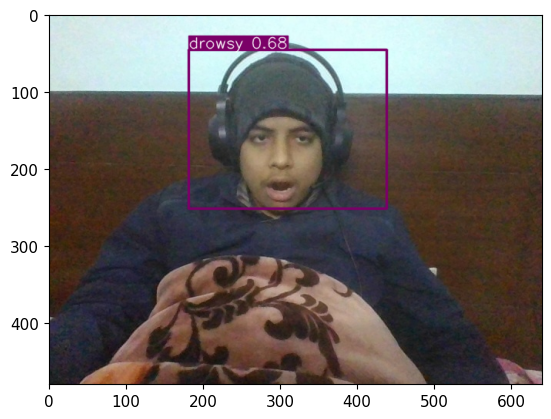

In [149]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [139]:
import cv2
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\Admin/.cache\torch\hub\ultralytics_yolov5_master\models